# Establish CAPEX estimation relationship for a feedstock hammer mill

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import settings
from functions.general.utility import get_project_root
from functions.TEA import convert_currency_annual_average
from functions.TEA.scaling import CEPCI_scale
from functions.general.curve_fitting import display_curve_fits, func_straight_line, func_power_curve


### Load data and do some data wrangling

In [2]:
# General parameters
root_dir = get_project_root()
updated_currency = "GBP"
updated_CEPCI_year = 2020
plot_style = settings.plotting.digital
# Load and display data
data_file = "CAPEX_hammermill.csv"
data_file_path = os.path.join(root_dir, "data", data_file)
df_source = pd.read_csv(data_file_path)
df = df_source.copy()  # working copy of original dataframe
df

,Process Reference,CAPEX,Currency,Plant size [tonnes/hour],Plant size [tonnes/year],Reference Year,Country,Comments,Reference,Reference Label,doi,Ignore
0,Hammermill,20492.30769,USD,1.05,7569.573284,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
1,Hammermill,26584.61538,USD,1.02,7346.938776,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
2,Hammermill,32123.07692,USD,3.40,24489.795920,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
3,Hammermill,39323.07692,USD,4.24,30500.927640,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
4,Hammermill,42646.15385,USD,4.21,30278.293140,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
5,Hammermill,37661.53846,USD,6.71,48311.688310,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
6,Hammermill,55384.61538,USD,6.15,44304.267160,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
7,Hammermill,64800.00000,USD,6.43,46307.977740,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
8,Hammermill,112984.61540,USD,3.37,24267.161410,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
9,Hammermill,155630.76920,USD,3.37,24267.161410,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN


In [3]:
# Convert all values to same currency and update to most recent CEPCI value
CAPEX_currency_scaled = []
CAPEX_currency_CEPCI_scaled = []

for row_no in df.index:
    CAPEX_currency_scaled.append(
        convert_currency_annual_average(value=df["CAPEX"][row_no], year=df["Reference Year"][row_no],
                                        base_currency=df["Currency"][row_no], converted_currency=updated_currency, 
                                        approximate_rate=True, method="yfinance"))
    CAPEX_currency_CEPCI_scaled.append(
        CEPCI_scale(base_year=df["Reference Year"][row_no], design_year=updated_CEPCI_year,
                    value=CAPEX_currency_scaled[row_no]))

# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df[currency_scaled_label] = CAPEX_currency_scaled
df[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

# Also add to original dataframe
df_source[currency_scaled_label] = CAPEX_currency_scaled
df_source[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

df

,Process Reference,CAPEX,Currency,Plant size [tonnes/hour],Plant size [tonnes/year],Reference Year,Country,Comments,Reference,Reference Label,doi,Ignore,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Hammermill,20492.30769,USD,1.05,7569.573284,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,11189.368148,11619.130115
1,Hammermill,26584.61538,USD,1.02,7346.938776,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,14515.937056,15073.466095
2,Hammermill,32123.07692,USD,3.40,24489.795920,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,17540.090611,18213.771533
3,Hammermill,39323.07692,USD,4.24,30500.927640,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,21471.490231,22296.168601
4,Hammermill,42646.15385,USD,4.21,30278.293140,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,23285.982367,24180.351867
5,Hammermill,37661.53846,USD,6.71,48311.688310,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,20564.244165,21354.076970
6,Hammermill,55384.61538,USD,6.15,44304.267160,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,30241.535536,31403.054367
7,Hammermill,64800.00000,USD,6.43,46307.977740,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,35382.596580,36741.573612
8,Hammermill,112984.61540,USD,3.37,24267.161410,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,61692.732507,64062.230923
9,Hammermill,155630.76920,USD,3.37,24267.161410,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,84978.714846,88242.582761


In [4]:
# Remove data points which should be ignored for whatever reason
df = df[df["Ignore"]!= True].copy()


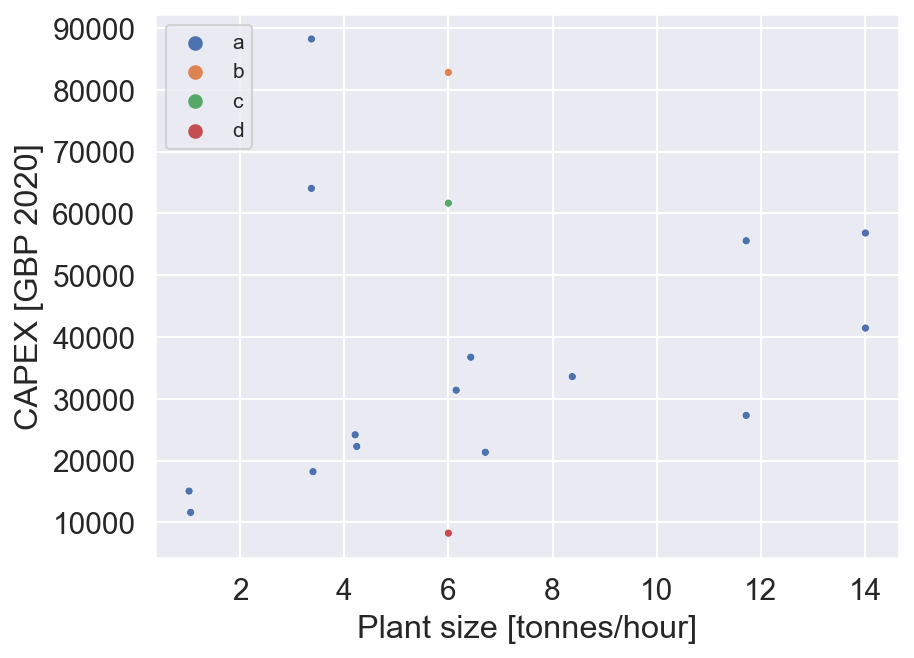

In [5]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df, x="Plant size [tonnes/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference Label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

Straight line fit: R2: 0.042; RMSE: 22871; MAPE: 72 %
Power curve fit: R2: 0.079; RMSE: 22418; MAPE: 69 %
2nd degree polynomial fit: R2: 0.054; RMSE: 22718; MAPE: 72 %
3rd degree polynomial: R2: 0.132; RMSE: 21765; MAPE: 66 %


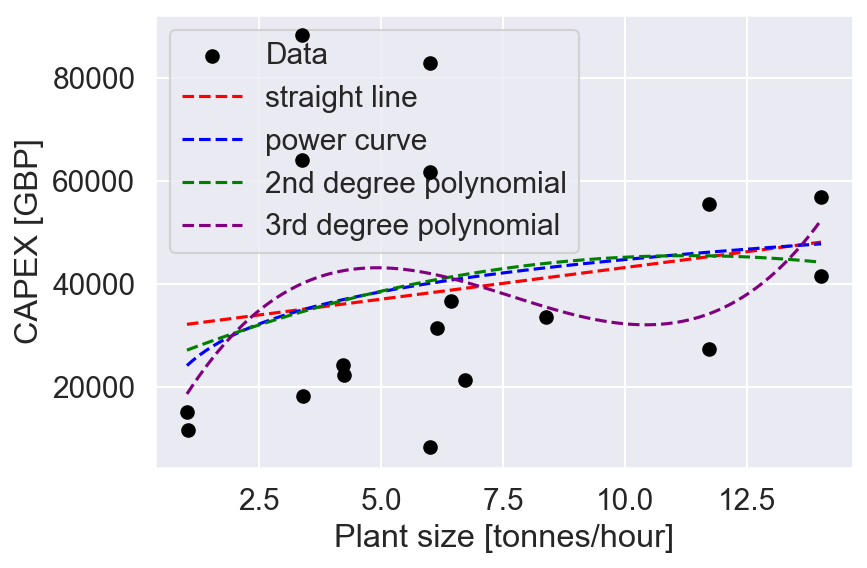

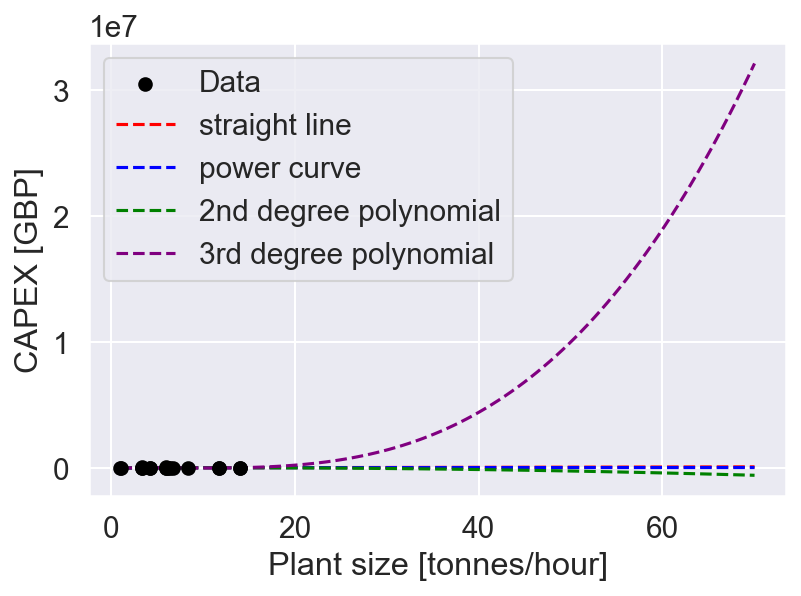

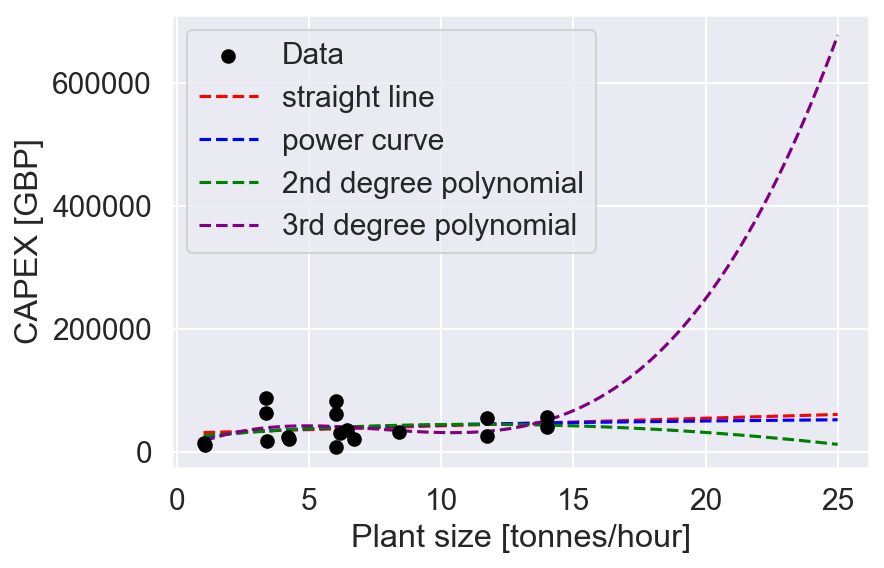

{'straight_line': {'Constants': array([ 1228.82613052, 30888.85795219]),
  'R2': 0.04165209131629477,
  'RMSE': 22871.114297127217},
 'power_curve': {'Constants': array([ 4.82264103e+07,  1.87032007e-04, -4.82024602e+07]),
  'R2': 0.07927062767886739,
  'RMSE': 22417.734607439656},
 '2nd_degree_polynomial': {'Constants': array([ 3921.18485982,  -173.39884453, 23306.41027304]),
  'R2': 0.054412811224156976,
  'RMSE': 22718.33578661236},
 '3rd_degree_polynomial': {'Constants': array([20423.20643909, -3057.72125477,   132.942421  ,   828.73844612]),
  'R2': 0.13210928217477713,
  'RMSE': 21764.978691796063},
 'data_range': {'min': 1.02, 'max': 14.01}}

In [6]:
display_curve_fits(dataframe=df, x_data_label="Plant size [tonnes/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]", plot_custom_x_range=[1, 25])


- Linear fit most suitable.
- Power curve does not increase enough after 20 or so.

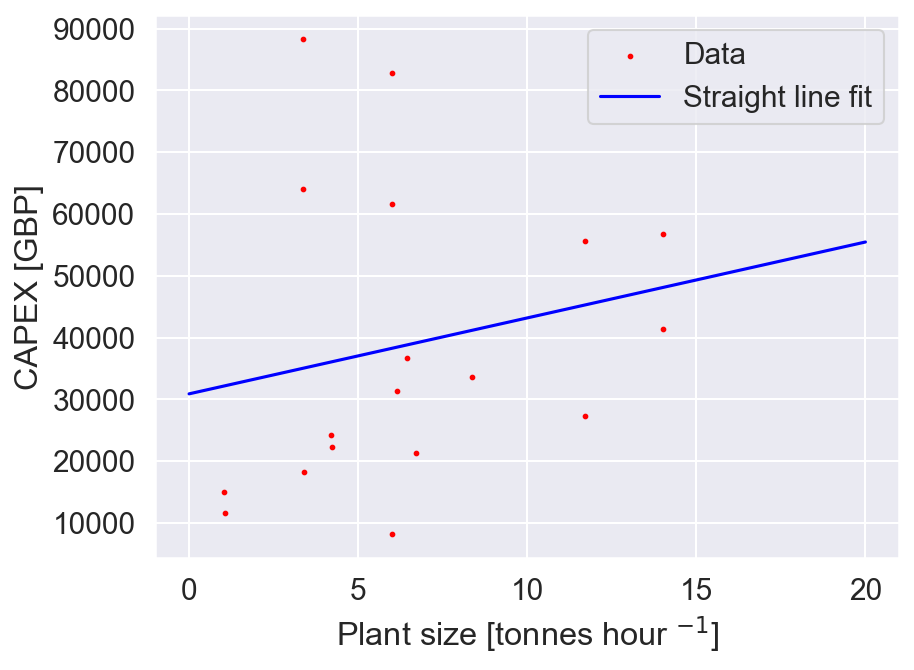

In [7]:
# Display data and fits in same plot
x_array =np.linspace(start=0, stop=20, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df["Plant size [tonnes/hour]"], df["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array, func_straight_line(x_array, *[1228.82613052, 30888.85795219]), label="Straight line fit", color="blue")
ax.set_xlabel("Plant size [tonnes hour $^{-1}$]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


# Conclusions
- Reasonable fit achieved.
- Outliers at > £80,000 make it challenging to fit a good distribution.